In [1]:
import pandas as pd
import ultraplot as uplt
from scipy.optimize import curve_fit
import numpy as np

In [18]:
df = pd.read_csv('../data/gdd_ncd.csv')

In [19]:
df.iloc[0]

ncd_2001    153.000000
gdd_2001    147.590001
SOS_2001    111.000000
ncd_2002    121.000000
gdd_2002    273.175001
               ...    
gdd_2023    325.995002
SOS_2023    109.000000
ncd_2024    123.000000
gdd_2024    369.380003
SOS_2024    113.000000
Name: 0, Length: 72, dtype: float64

In [20]:
def get_pixel_df(df, i):
    years = list(range(2001, 2025))
    pixel_df = pd.DataFrame(columns=['gdd', 'ncd', 'SOS'], index=years)
    for year in years:
        pixel_df.loc[year, 'gdd'] = df.iloc[i].loc[f'gdd_{year}']
        pixel_df.loc[year, 'ncd'] = df.iloc[i].loc[f'ncd_{year}']
        pixel_df.loc[year, 'SOS'] = df.iloc[i].loc[f'SOS_{year}']
    return pixel_df

In [21]:
pixels = [get_pixel_df(df, i) for i in range(0, 60)]

In [22]:
def f(x, a, b, c):
    return a + b*np.exp(c*x)

In [23]:
np.exp(3)

np.float64(20.085536923187668)

In [24]:
pixels[1]['ncd']

2001    152.0
2002    123.0
2003    146.0
2004    141.0
2005    140.0
2006    129.0
2007    130.0
2008    150.0
2009    137.0
2010    124.0
2011    150.0
2012    125.0
2013    150.0
2014    148.0
2015    149.0
2016    121.0
2017    123.0
2018    156.0
2019    148.0
2020    144.0
2021    130.0
2022    138.0
2023    133.0
2024    123.0
Name: ncd, dtype: object

In [25]:
curve_fit(f, pixels[1]['ncd'].to_numpy(), pixels[1]['gdd'].to_numpy(), p0=[-68, 638, -0.01], maxfev = 10000)

(array([ 7.12812009e+01,  6.50784888e+03, -2.58559950e-02]),
 array([[ 1.05036593e+05,  8.92629084e+06, -1.42361263e+01],
        [ 8.92629084e+06,  7.74611839e+08, -1.22838415e+03],
        [-1.42361263e+01, -1.22838415e+03,  1.95110633e-03]]))

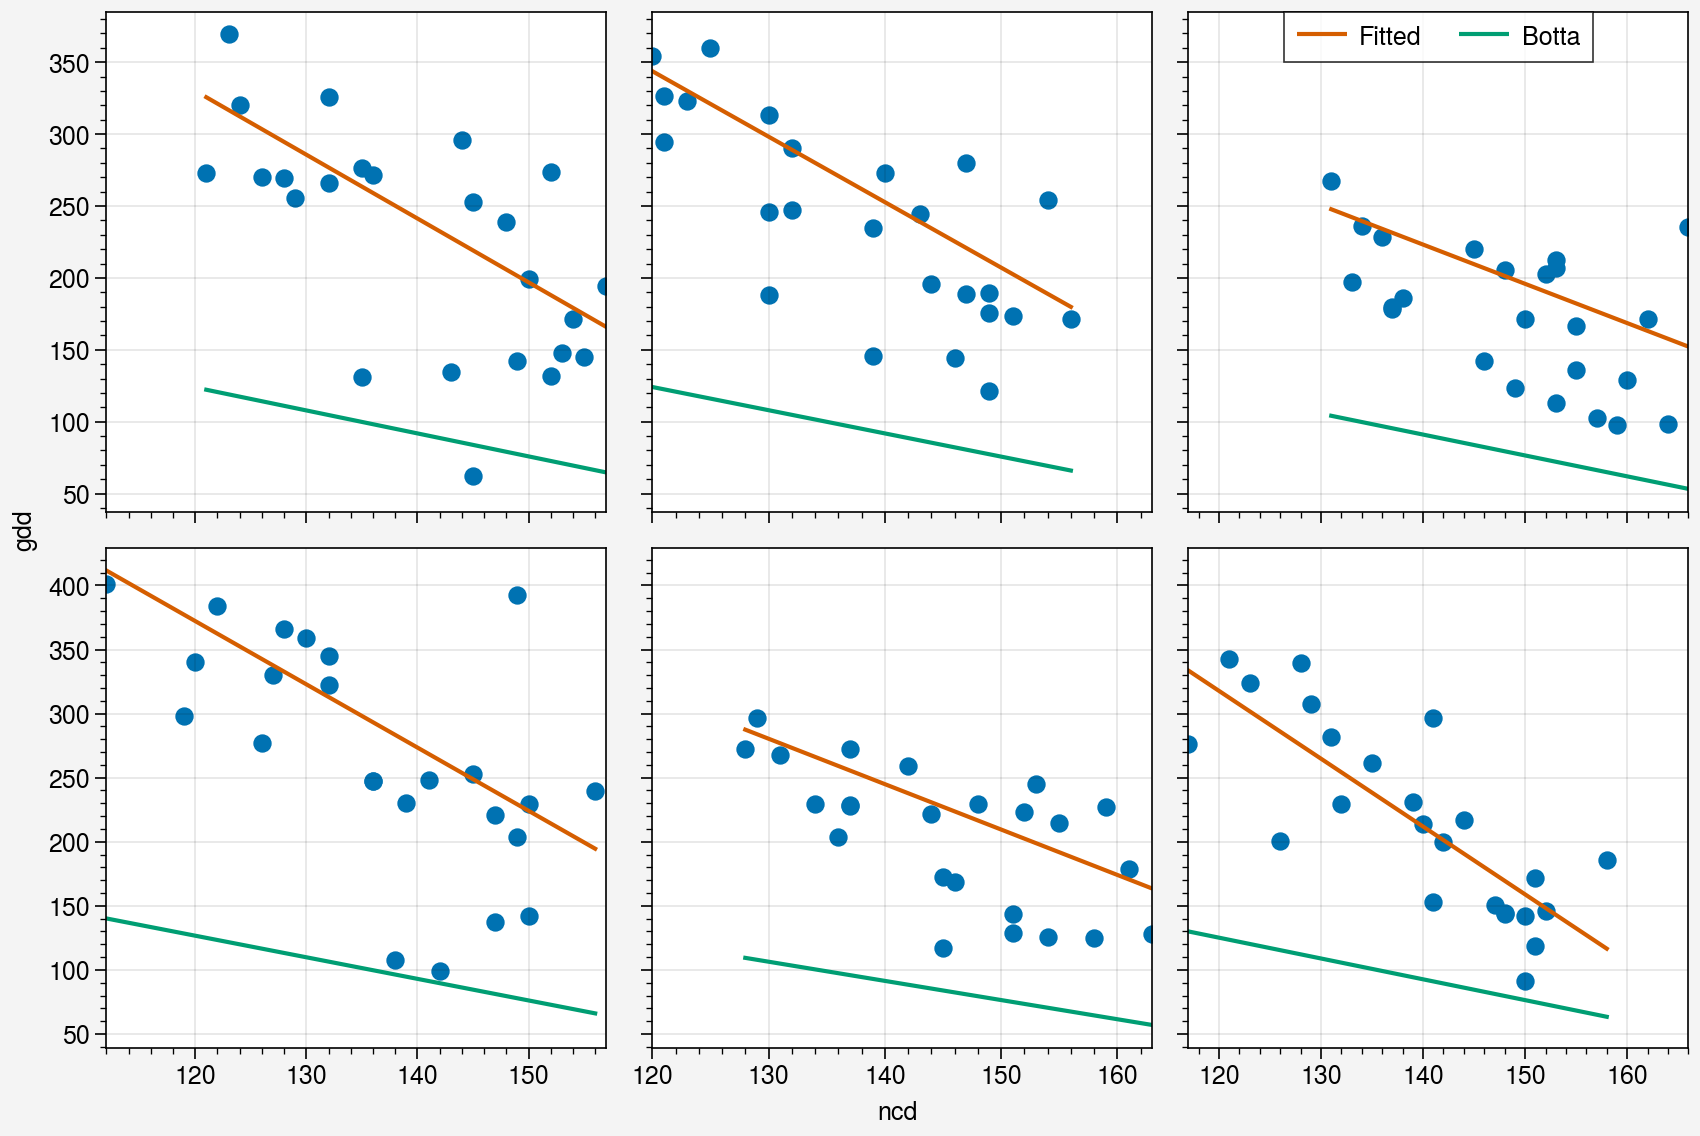

In [34]:
fig, axes = uplt.subplots(nrows=2, ncols=3)
for i in range(0, 60, 10):
    axes[i//10].scatter(pixels[i]['ncd'], pixels[i]['gdd'], label='')
    popt, _ = curve_fit(f, pixels[i]['ncd'].to_numpy(), pixels[i]['gdd'].to_numpy(), p0=[-68, 638, -0.01], maxfev = 10000)
    endpoints = np.array([pixels[i]['ncd'].min(), pixels[i]['ncd'].max()])
    axes[i//10].plot(endpoints, f(endpoints, *popt), label='Fitted')
    axes[i//10].plot(endpoints, f(endpoints, -68, 638, -0.01), label='Botta')
axes[2].legend()

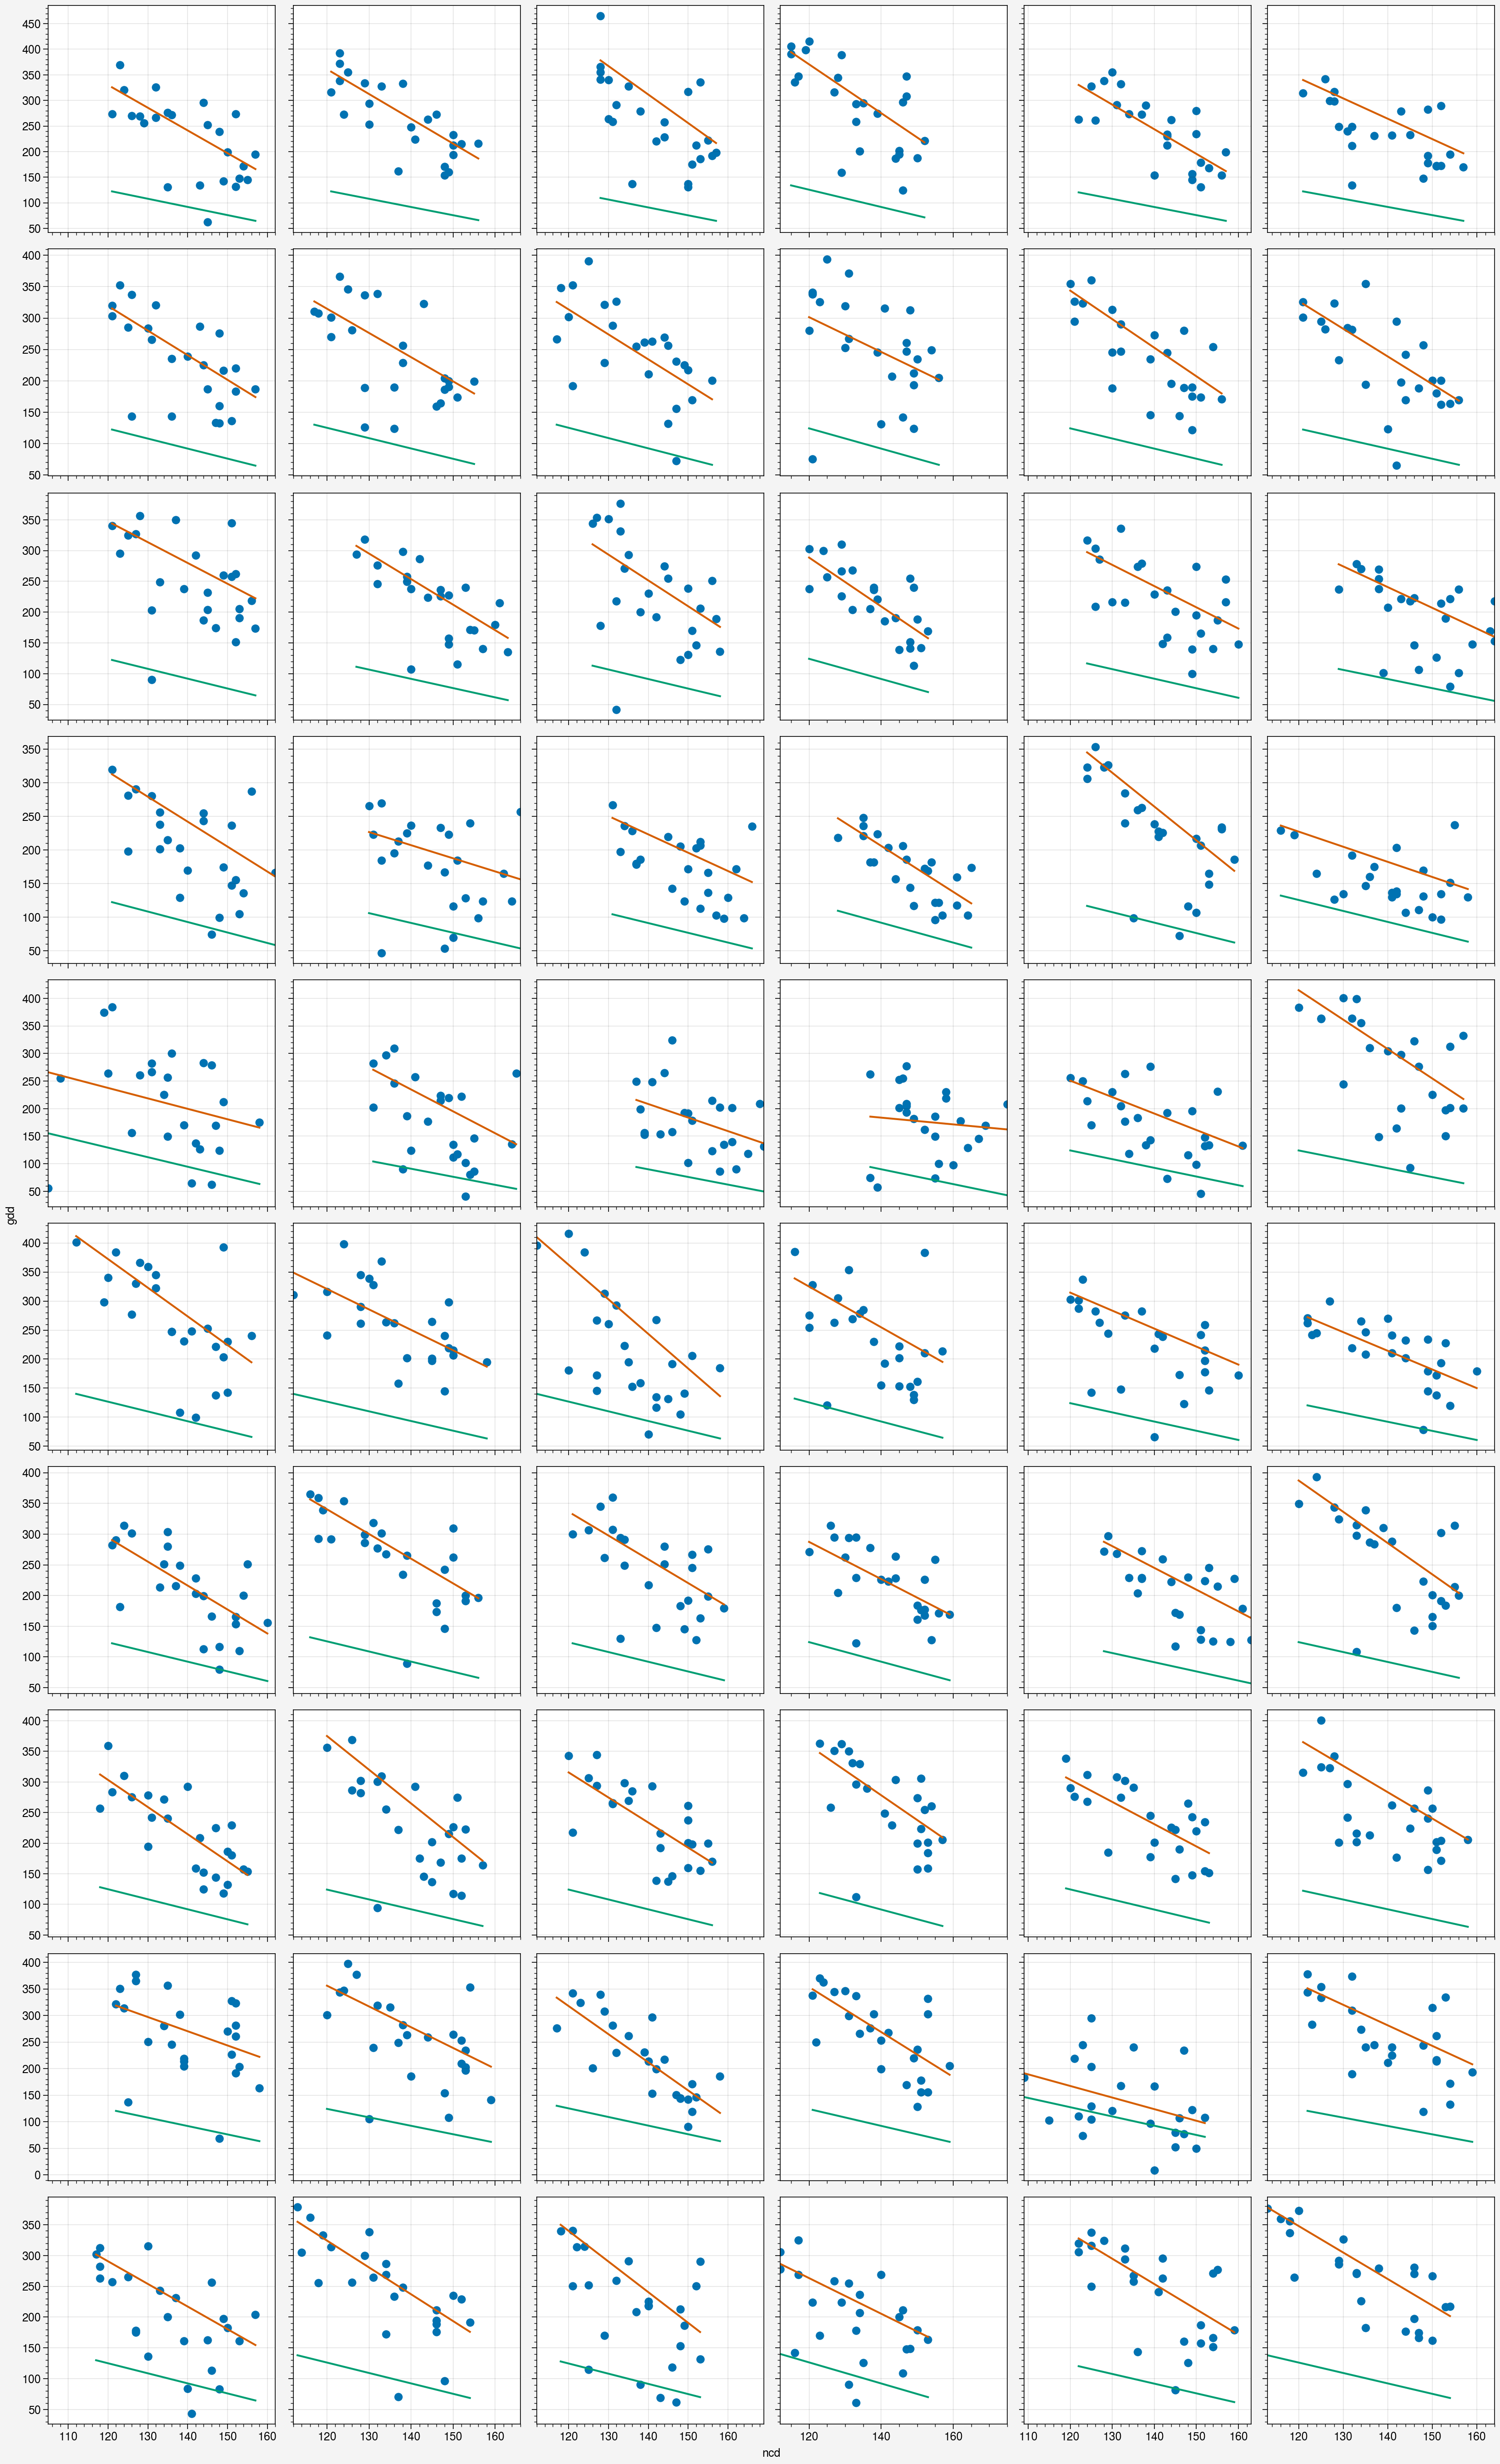

In [32]:
fig, axes = uplt.subplots(nrows=10, ncols=6)
for i in range(60):
    axes[i].scatter(pixels[i]['ncd'], pixels[i]['gdd'])
    popt, _ = curve_fit(f, pixels[i]['ncd'].to_numpy(), pixels[i]['gdd'].to_numpy(), p0=[-68, 638, -0.01], maxfev = 10000)
    endpoints = np.array([pixels[i]['ncd'].min(), pixels[i]['ncd'].max()])
    axes[i].plot(endpoints, f(endpoints, *popt))
    axes[i].plot(endpoints, f(endpoints, -68, 638, -0.01))